### Welcome to EDA of a superstore sales dataset!

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/artemedius/repo/main/EDA/superstore_sales.csv'
df = pd.read_csv(url, index_col=0, encoding= "unicode_escape")
df.columns = df.columns.str.lower()
df[['order date','ship date']] = df[['order date','ship date']].apply(pd.to_datetime)
df = df.reset_index().drop(['Row ID', 'country'], axis=1)

#### Top ten states by total sales

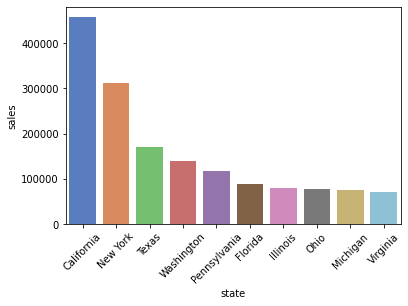

In [12]:
sb = pd.DataFrame(df.groupby(['state'])['sales'].sum()).reset_index() #sales by state (SBS)
sbshort = sb.sort_values(by='sales', ascending=False)[0:10]
palette = sns.color_palette('muted')
ax = sns.barplot(x='state', y='sales', data=sbshort, palette=palette)
ax = ax.tick_params(axis='x', rotation=45)

Text(0.5, 1.0, 'Percentage of total sales by region')

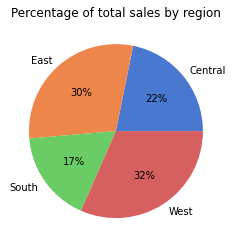

In [13]:
#sales by region
sb = pd.DataFrame(df.groupby(['region'])['sales'].sum()).reset_index()
sb['percent'] = sb['sales']/sb['sales'].sum()
plt.pie(sb['percent'], labels=sb['region'], colors=palette, autopct='%.0f%%')
plt.title('Percentage of total sales by region')

#### Total sales by customer segment

Text(0.5, 1.0, 'Percentage of total sales by customer segment')

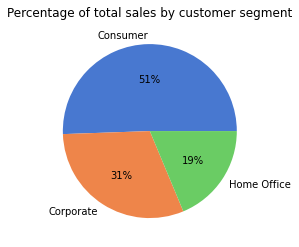

In [14]:
#sales by customer segment
sb = pd.DataFrame(df.groupby(['segment'])['sales'].sum()).reset_index()
sbshort = sb.sort_values(by='sales', ascending=False)
sb['percent'] = sb['sales']/sb['sales'].sum()

plt.pie(sb['percent'], labels=sb['segment'], colors=palette, autopct='%.0f%%')
plt.title('Percentage of total sales by customer segment')

#### Top ten sub-categories by total sales

Text(0.5, 1.0, 'Top ten sub-categories by total sales')

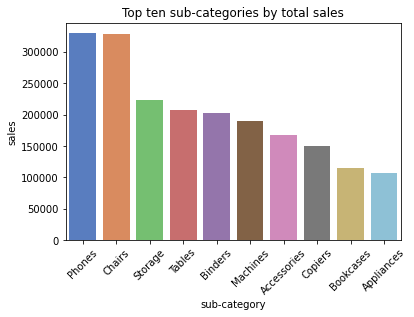

In [15]:
#sales by sub-category
sbs = pd.DataFrame(df.groupby(['sub-category'])['sales'].sum()).reset_index()
sbshort = sbs.sort_values(by='sales', ascending=False)[0:10]
ax = sns.barplot(x='sub-category', y='sales', data=sbshort, palette=palette)
ax = ax.tick_params(axis='x', rotation=45)
plt.title('Top ten sub-categories by total sales')

Since phones and chairs sell the most, what are the best-selling brands?

C:\Users\a.fedosov\AppData\Local\Temp\ipykernel_5416\1754485193.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phones['brand'] = phones['product name'].apply(lambda x: f'{get_brand(x)}')


Text(0.5, 1.0, 'Top phone brands by total sales')

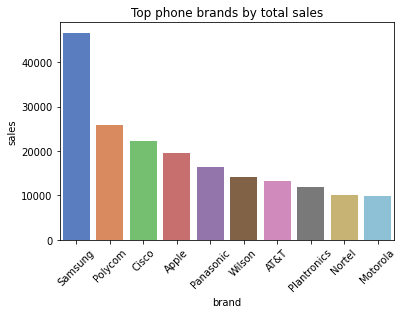

In [16]:
phones = df.loc[df['sub-category'] == 'Phones']

def get_brand(x):
    return x.split(' ')[0].strip(' ')
phones['brand'] = phones['product name'].apply(lambda x: f'{get_brand(x)}')
brands = pd.DataFrame(phones.groupby('brand')['sales'].sum()).reset_index()
brandshort = brands.sort_values(by='sales', ascending=False)[0:10]
brandshort['percent'] = brandshort['sales']/brandshort['sales'].sum()

#top-selling brands barchart
ax = sns.barplot(x='brand', y='sales', data=brandshort, palette=palette)
ax = ax.tick_params(axis='x', rotation=45)
plt.title('Top phone brands by total sales')

C:\Users\a.fedosov\AppData\Local\Temp\ipykernel_5416\767563210.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chairs['brand'] = chairs['product name'].apply(lambda x: f'{get_brand(x)}')


Text(0.5, 1.0, 'Top chair brands by total sales')

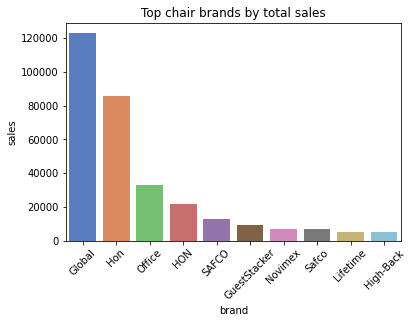

In [17]:
{
    "tags": [
        "hide-input",
    ]
}
chairs = df.loc[df['sub-category'] == 'Chairs']

chairs['brand'] = chairs['product name'].apply(lambda x: f'{get_brand(x)}')
brands = pd.DataFrame(chairs.groupby('brand')['sales'].sum()).reset_index()
brandshort = brands.sort_values(by='sales', ascending=False)[0:10]
brandshort['percent'] = brandshort['sales']/brandshort['sales'].sum()

#top-selling brands barchart
ax = sns.barplot(x='brand', y='sales', data=brandshort, palette=palette)
ax = ax.tick_params(axis='x', rotation=45)
plt.title('Top chair brands by total sales')